In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import plot_func as f

In [2]:
ds = xr.open_dataset('gridfile_test.nc')
ds2 = xr.open_dataset('erai_regrid_5x5.nc')
obs = xr.open_dataset('../GPS-RO__CP_LR_5x5_2007-2018.nc')

In [3]:
ds_slice = ds.sel(lat=slice(-20,20))
obs_slice = obs.sel(lat = slice(-20,20))
ds2_slice = ds2.sel(lat=slice(-20,20), time=slice('2007-01-01', '2018-12-31'))

In [4]:
obs_mon = obs_slice.resample(time='M').mean()

In [5]:
era5_mm = ds_slice.groupby('time.month').mean(dim='time')
erai_mm = ds2_slice.groupby('time.month').mean(dim='time')
obs_mm = obs_slice.groupby('time.month').mean(dim='time')

/uio/hume/student-u62/johanmeh/anaconda3/envs/py36/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [6]:
d_lrz = ds_slice.tpz[:,:,:].mean(axis=0)-obs_mon.LR_z[:,:,:].mean(axis=0)
d_lrt = ds_slice.tpt[:,:,:].mean(axis=0)-obs_mon.LR_T[:,:,:].mean(axis=0)

d2_lrz = ds2_slice.tpz[:,:,:].mean(axis=0)-obs_mon.LR_z[:,:,:].mean(axis=0)
d2_lrt = ds2_slice.tpt[:,:,:].mean(axis=0)-obs_mon.LR_T[:,:,:].mean(axis=0)

obs_mean_lrz = obs_mon.LR_z[:,:,:].mean(axis=0)
obs_mean_lrt = obs_mon.LR_T[:,:,:].mean(axis=0)

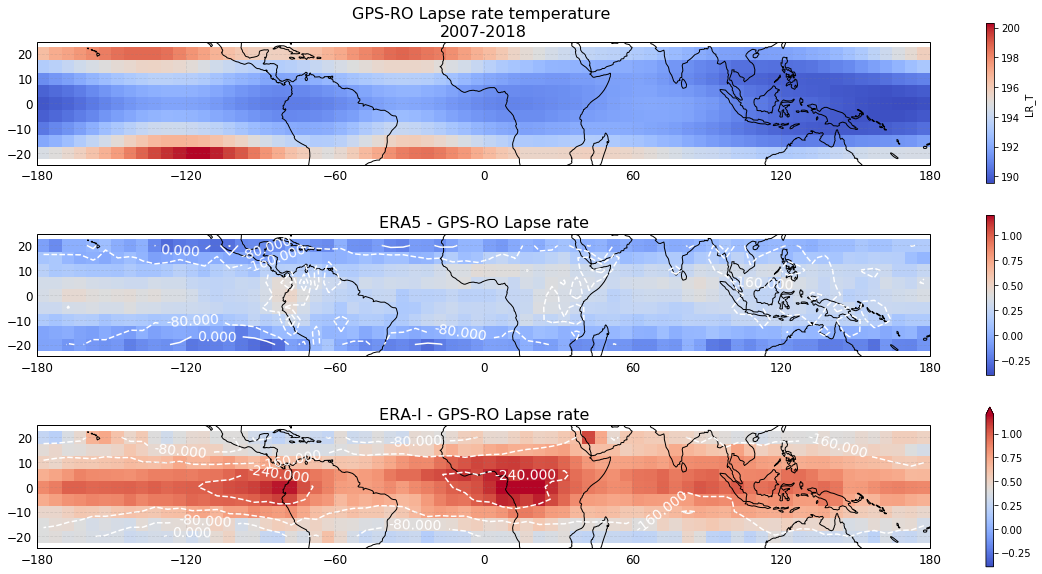

In [7]:
f1 = f.three_plot_contour(obs_mean_lrt, d_lrt, d_lrz*1000, d2_lrt, d2_lrz*1000, 'GPS-RO Lapse rate temperature \n2007-2018', 
                  'ERA5 - GPS-RO Lapse rate', 'ERA-I - GPS-RO Lapse rate', 
                 vmin=-0.4, vmax=1.2)
#f1.savefig('LR_mean_zt.pdf')

In [8]:
d_cpz = ds_slice.ctpz[:,:,:].mean(axis=0)-obs_mon.CP_z[:,:,:].mean(axis=0)
d_cpt = ds_slice.ctpt[:,:,:].mean(axis=0)-obs_mon.CP_T[:,:,:].mean(axis=0)

d2_cpz = ds2_slice.ctpz[:,:,:].mean(axis=0)-obs_mon.CP_z[:,:,:].mean(axis=0)
d2_cpt = ds2_slice.ctpt[:,:,:].mean(axis=0)-obs_mon.CP_T[:,:,:].mean(axis=0)

obs_mean_cpz = obs_mon.CP_z[:,:,:].mean(axis=0)
obs_mean_cpt = obs_mon.CP_T[:,:,:].mean(axis=0)

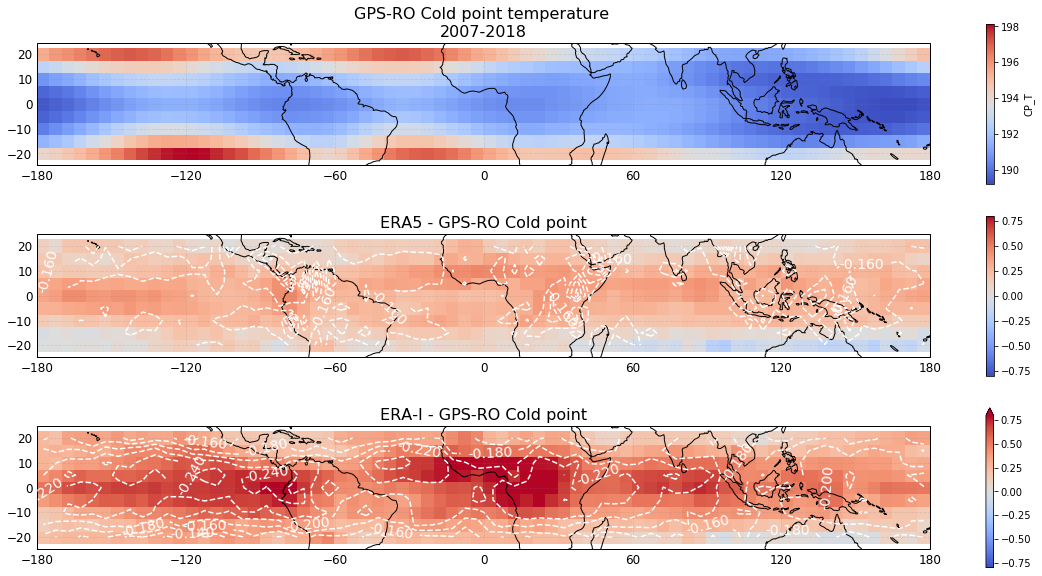

In [9]:
f2 = f.three_plot_contour(obs_mean_cpt, d_cpt, d_cpz, d2_cpt, d2_cpz, 'GPS-RO Cold point temperature \n2007-2018',
                'ERA5 - GPS-RO Cold point', 'ERA-I - GPS-RO Cold point', vmin=-0.8, vmax=0.8)

#f2.savefig('CP_mean_zt.pdf')

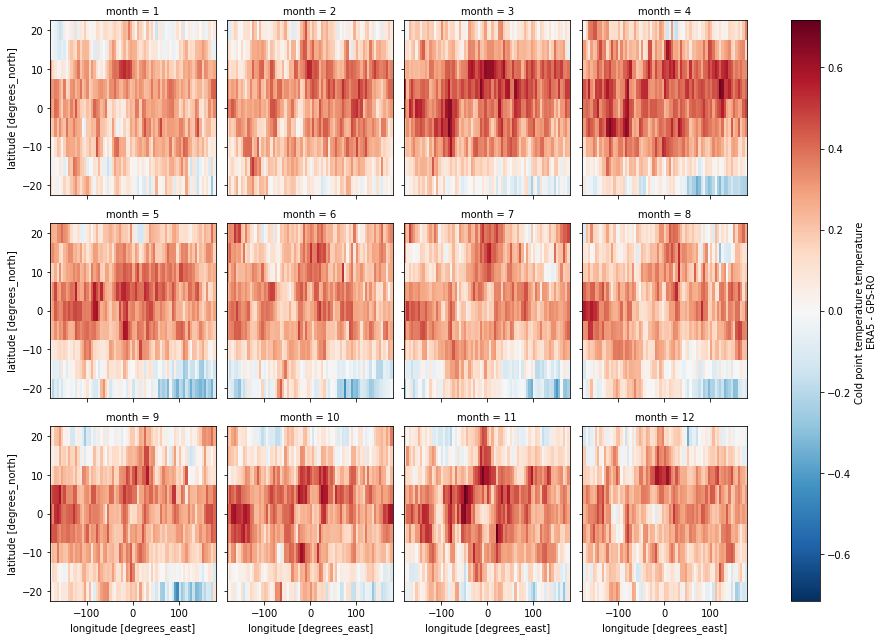

In [10]:
d1 = era5_mm.ctpt[:,:,:] - obs_mm.CP_T[:,:,:]
#g_simple2 = d1.plot(x='lon', y='lat', col='month', col_wrap=4)
ss1 = d1.plot.pcolormesh('lon', 'lat', col='month', col_wrap=4, 
                         cbar_kwargs={'label': 'Cold point temperature temperature \nERA5 - GPS-RO'})
#plt.savefig('figs/cpt_era5_monthly_latlon.pdf')

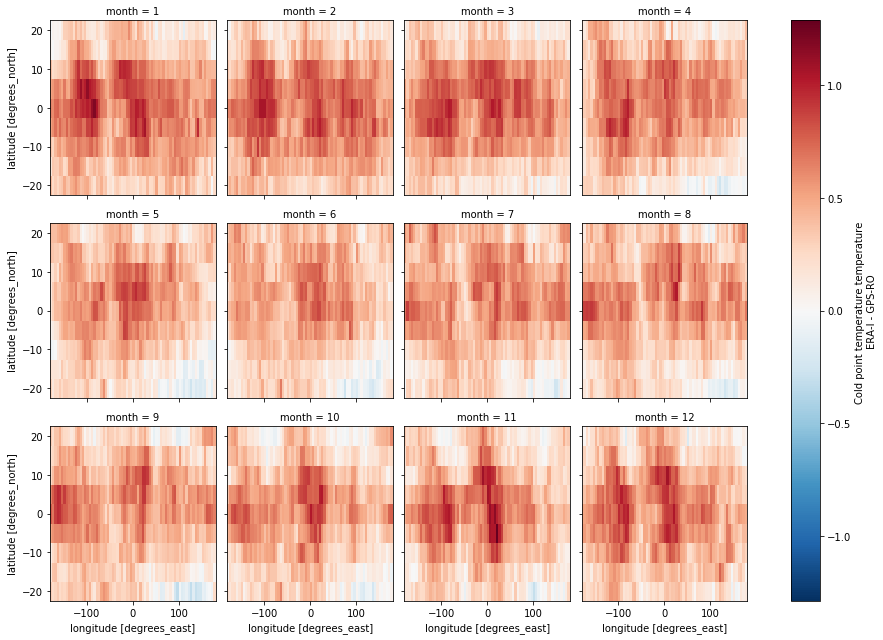

In [11]:
d2 = erai_mm.ctpt[:,:,:] - obs_mm.CP_T[:,:,:]
#d2.plot(x='lon', y='lat', col='month', col_wrap=4)
d22 = d2.plot.pcolormesh('lon', 'lat', col='month', col_wrap=4, 
                         cbar_kwargs={'label': 'Cold point temperature temperature \nERA-I - GPS-RO'})
#plt.savefig('figs/cpt_erai_monthly_latlon.pdf')

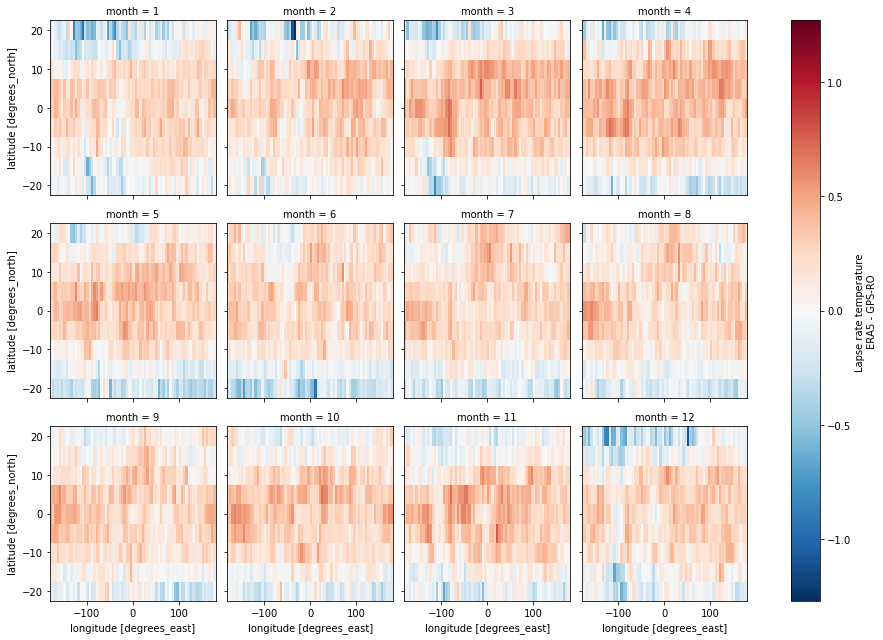

In [12]:
d3 = era5_mm.tpt[:,:,:] - obs_mm.LR_T[:,:,:]
#d3.plot(x='lon', y='lat', col='month', col_wrap=4)

d33 = d3.plot.pcolormesh('lon', 'lat', col='month', col_wrap=4, 
                         cbar_kwargs={'label': 'Lapse rate temperature \nERA5 - GPS-RO'})
#plt.savefig('figs/lrt_era5_monthly_latlon.pdf')

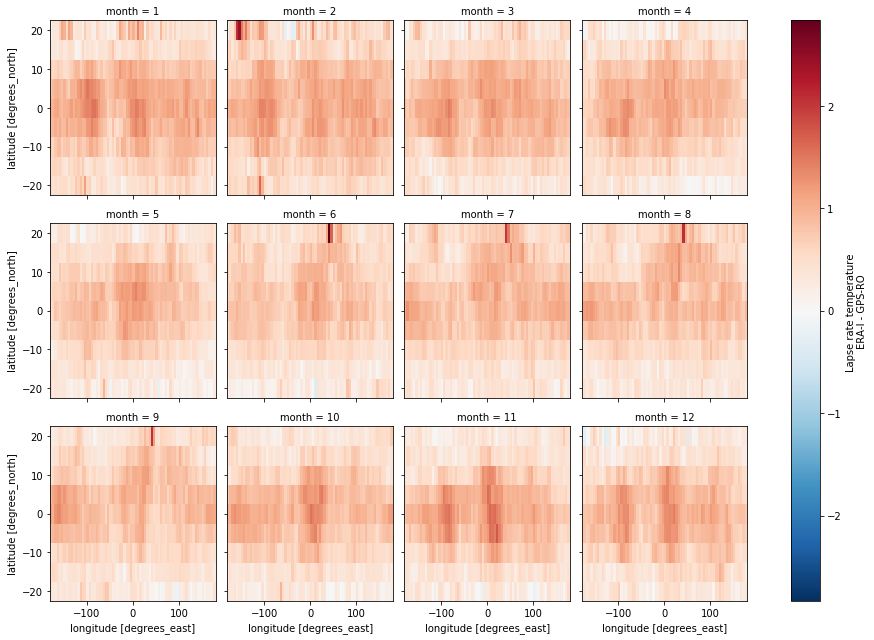

In [13]:
d4 = erai_mm.tpt[:,:,:] - obs_mm.LR_T[:,:,:]
#d4.plot(x='lon', y='lat', col='month', col_wrap=4)

d44 = d4.plot.pcolormesh('lon', 'lat', col='month', col_wrap=4, 
                         cbar_kwargs={'label': 'Lapse rate temperature \nERA-I - GPS-RO'})
#plt.savefig('figs/lrt_erai_monthly_latlon.pdf')

In [14]:
era5_s = ds_slice.groupby('time.season').mean(dim='time')
erai_s = ds2_slice.groupby('time.season').mean(dim='time')
obs_s = obs_slice.groupby('time.season').mean(dim='time')

/uio/hume/student-u62/johanmeh/anaconda3/envs/py36/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


AttributeError: 'QuadMesh' object has no property 'colwrap'

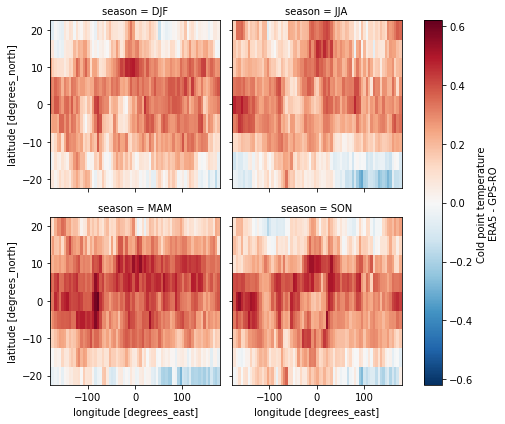

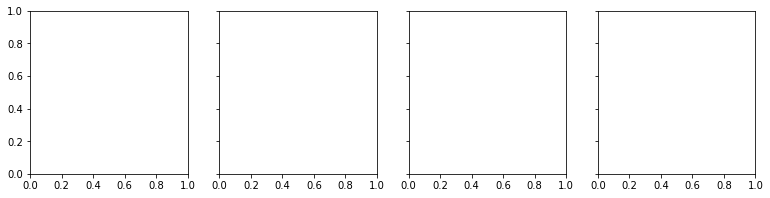

In [15]:
s1 = era5_s.ctpt[:,:,:] - obs_s.CP_T[:,:,:]
ss1 = s1.plot.pcolormesh('lon', 'lat', col='season', col_wrap=2, 
                         cbar_kwargs={'label': 'Cold point temperature \nERA5 - GPS-RO'})
g1 = era5_s.ctpt[:,:,:] - erai_s.ctpt[:,:,:]
gg1 = g1.plot.pcolormesh('lon', 'lat', col='season', colwrap=2, 
                        cbar_kwargs={'label' : 'Cold point temperaure \nERA5 - ERA-I'})

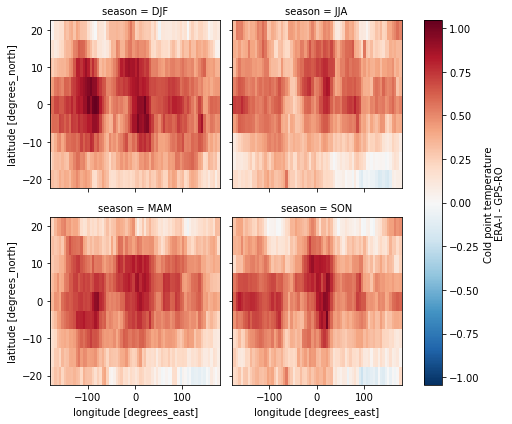

In [17]:
s2 = erai_s.ctpt[:,:,:] - obs_s.CP_T[:,:,:]
ss2 = s2.plot.pcolormesh('lon', 'lat', col = 'season', col_wrap=2, 
                         cbar_kwargs={'label': 'Cold point temperature \nERA-I - GPS-RO'})


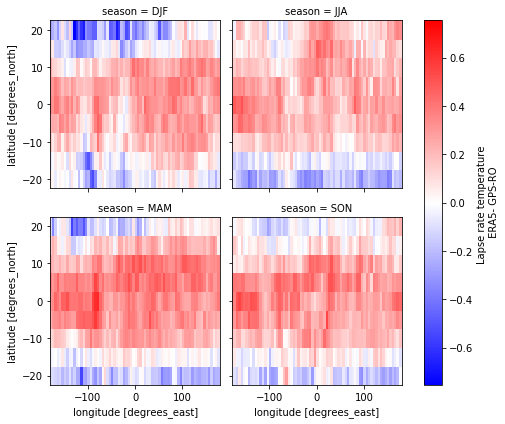

In [18]:
s3 = era5_s.tpt[:,:,:] - obs_s.LR_T[:,:,:]
ss3 = s3.plot.pcolormesh('lon', 'lat', col='season', col_wrap=2, 
                         cbar_kwargs={'label': 'Lapse rate temperature \n ERA5- GPS-RO'}, cmap='bwr')



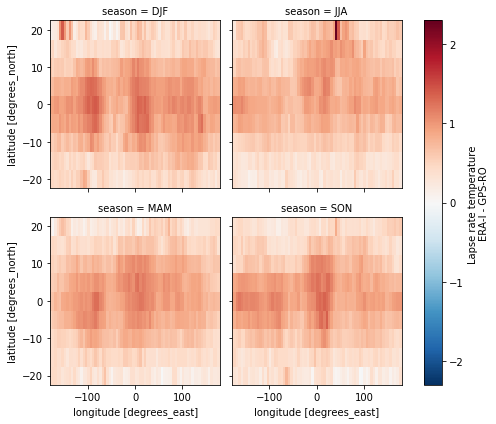

In [47]:
s4 = erai_s.tpt[:,:,:] - obs_s.LR_T[:,:,:]
ss4 = s4.plot.pcolormesh('lon', 'lat', col='season', col_wrap=2, 
                         cbar_kwargs={'label': 'Lapse rate temperature \nERA-I - GPS-RO'})
